In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math

# Esercizio 3

In [3]:
cars = pd.read_csv('carsharing.csv', sep=';', decimal=',')
cars

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
387,996,FRAME C,0,-1,12.5,13.1
388,996,FRAME A,0,1,14.5,17.0
389,996,FRAME C,0,-1,9.8,17.8
390,997,FRAME B,1,-1,1.8,4.0


3.1 Quanti dati contiene il file?

In [4]:
len(cars)

392

3.2 Analizziamo l'utilizzo del servizio nelle diverse fasce orarie e negli orari di punta o meno.

3.2.1 TimeFrame è ordinale, scalare o nominale?

TimeFrame è un attributo di tipo qualitativo ordinale

3.2.2 In quante fasce orarie è suddivisa la giornata?

In [5]:
len(cars.TimeFrame.unique())

5

3.2.3 In quali fasce orarie il servizio è stato maggiormente utilizzato?

In [12]:
cars.TimeFrame.value_counts().head()

TimeFrame
FRAME B    123
FRAME C    107
FRAME D     94
FRAME A     47
FRAME E     21
Name: count, dtype: int64

3.2.4 Tabella frequenze congiunte di TimeFrame e RushHour

In [13]:
time_hour = pd.crosstab(index=[cars.TimeFrame], columns=[cars.RushHour], colnames=[''])
time_hour

,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


3.2.5 Utilizzando i risultati di prima, quali sono le fasce orarie di punta?

Le fasce orarie di punta sono FRAME B e FRAME D

3.3 Consideriamo i clienti premium

In [14]:
premium = cars[cars['PremiumCustomer'] == 1]
premium

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
3,110,FRAME D,1,1,2.8,5.0
6,111,FRAME B,1,1,9.3,30.6
10,121,FRAME B,1,1,0.8,4.4
...,...,...,...,...,...,...
382,987,FRAME A,0,1,18.7,25.2
383,989,FRAME A,0,1,7.7,13.1
386,995,FRAME B,1,1,2.1,4.4
388,996,FRAME A,0,1,14.5,17.0


3.3.1 Quanti sono?

In [15]:
len(premium)

227

3.3.2 Stima distanza media percorsa da un cliente premium

In [17]:
print(f'{premium.Distance.mean()} km')

8.437444933920705 km


3.3.3 Stima probabilità p che un nuovo cliente si iscriva al programma premium

In [22]:
p = len(premium)/len(cars)
p

0.5790816326530612

3.3.4 Stimatore usato prima?

(Media campionaria + 1)/2  perchè in questo modo posso stimare p (nuovo cliente è premium) nei termini di una bernoulliana.

3.3.5 Approssimazione probabilità di compiere nella stima di P un errore di al più 0.05

In [23]:
z = st.norm(0,1)

n = len(cars)
arg = (0.05*math.sqrt(n))/(math.sqrt(p*(1-p))) 

2*z.cdf(arg) -1

0.9550516727103744

3.4 Riconsideriamo il dataset completo e consideriamo Distance

3.4.1 Il suo boxplot

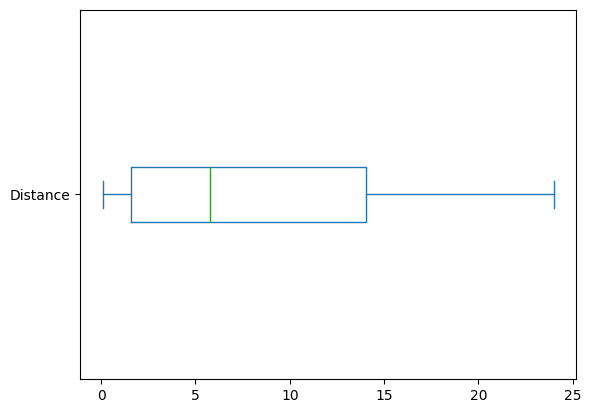

In [24]:
cars.Distance.plot.box(vert=False)
plt.show()

3.4.2 In base all'aspetto del grafico ottenuto in precedenza, quali sono gli indici di centralità e dispersione che meglio caratterizzano Distance?

Un indice di centralità visibile è la mediana (barra verde dentro la scatola) mentre un indice di dispersione è il range interquartile (distanza tra estremo destro della scatola - 3° quartile - ed estremo sinistro della scatola - 1° quartile).
Volendoli calcolare sono:

In [27]:
print(f'Mediana: {cars.Distance.median()}\nRange Interquartile: {cars.Distance.quantile(0.75)-cars.Distance.quantile(0.25)}')

Mediana: 5.75
Range Interquartile: 12.45


3.4.3 Vi è relazione tra distanza percorsa e tempo impiegato?

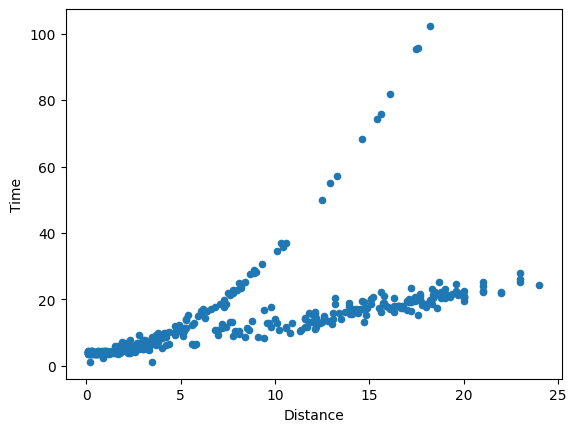

In [30]:
cars.plot.scatter('Distance', 'Time')
plt.show()

Lo scatter plot evidenzia due andamenti: una relazione di tipo non lineare diretta abbastanza forte e un altro che invece non rappresenta alcun tipo di relazione, o meglio una relazione di tipo non lineare diretta piuttosto debole. Per cui, direi che non vi è alcun tipo di relazione tra i due attributi.

3.4.4 L'indice di correlazione conferma la vostra ipotesi?

In [31]:
cars.Distance.corr(cars.Time)

0.6273992247694645

3.5 Analizziamo la distanza percorsa in ogni servizio in orario di punta

In [32]:
rush = cars[cars['RushHour'] == 1]
rush

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
378,983,FRAME D,1,-1,1.2,3.9
384,991,FRAME D,1,-1,1.0,3.9
385,993,FRAME B,1,-1,2.6,5.6
386,995,FRAME B,1,1,2.1,4.4


3.5.1 Grafico adatto per Distance

Essendo un attributo di tipo quantitativo continuo, la rappresentazione grafica più appropriata è un istogramma.

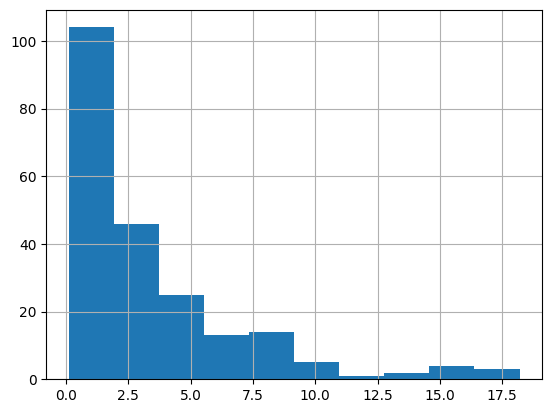

In [33]:
rush.Distance.hist()
plt.show()

3.5.2 Distance negli orari di punta segue una legge normale?

Osservando l'istogramma prodotto prima, si vede come non abbia la tipica forma a campana che caratterizza la distribuzione normale, per cui confutiamo l'ipotesi.
Per ulteriore conferma si può vedere il QQplot

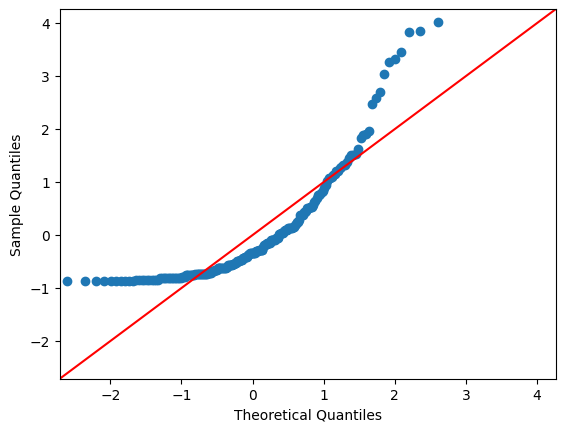

In [35]:
sm.qqplot(rush.Distance, fit = True, line="45")
plt.show()

3.5.3 Stimare valore atteso e deviazione standard della distanza negli orari di punta

In [36]:
print(f'Valore atteso: {rush.Distance.mean()}\nDeviazione standard: {rush.Distance.std()}')

Valore atteso: 3.319354838709678
Deviazione standard: 3.711106147915897


3.5.4 Quale modello segue distance negli orari di punta?

Osservando l'istogramma prodotto in precedenza che ha un decadimento di tipo esponenziale e i valori di media e deviazione standard molto simili, si può dire che la distanza negli orari di punta segue una distribuzione esponenziale.
Il QQplot conferma tale ipotesi.